In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

from src.visualisations.raw_data import plot_enose_trial_df, plot_pid_trial_df
from src.utils.misc import get_trial_df

In [3]:
parent_dir = Path('/users/micas/ymolle/MachineLearning/High_speed_odour_classification/Dataset_original')    # Change this to the directory where you store the data

data_dir_enose = parent_dir.joinpath('Dataset-FastMachineOlfaction/Enose')
data_dir_pid = parent_dir.joinpath('Dataset-FastMachineOlfaction/PID/Full')

assert data_dir_enose.exists(), f'{data_dir_enose} does not exist'
assert data_dir_pid.exists(), f'{data_dir_pid} does not exist'

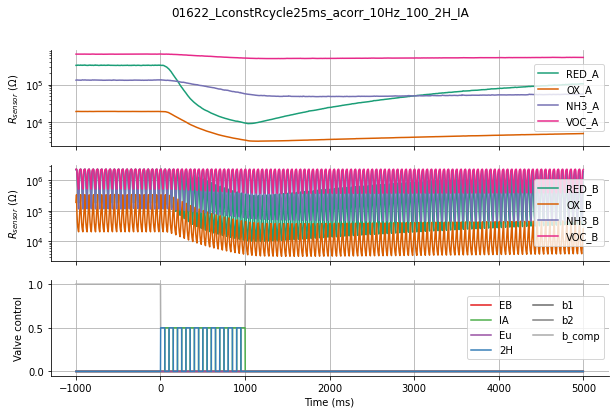

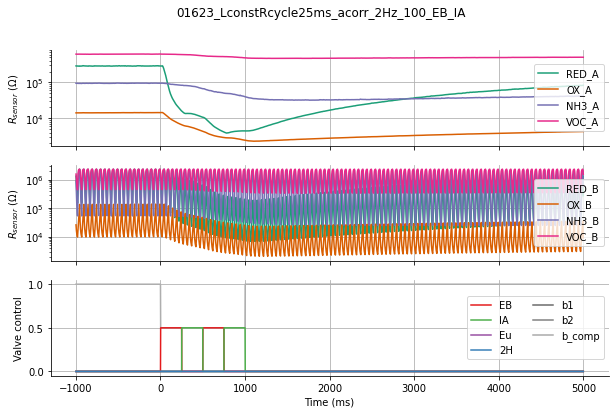

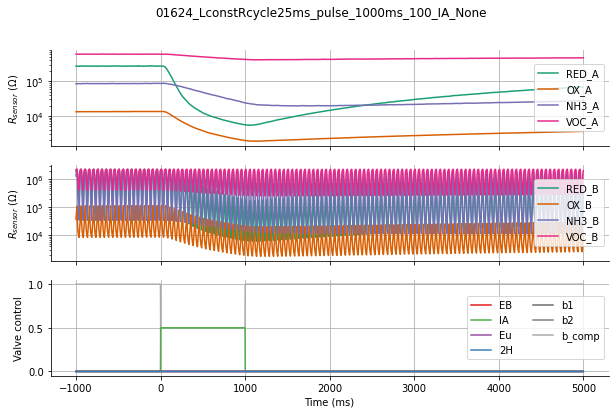

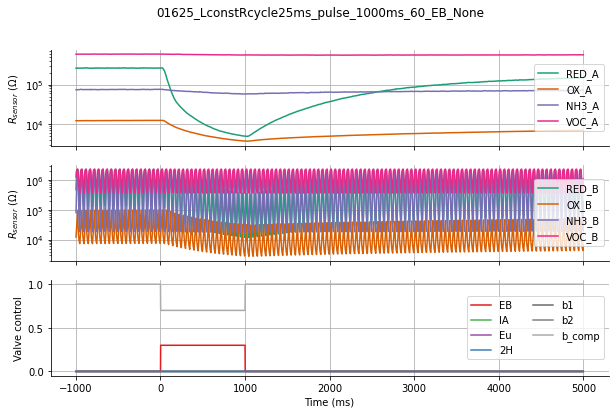

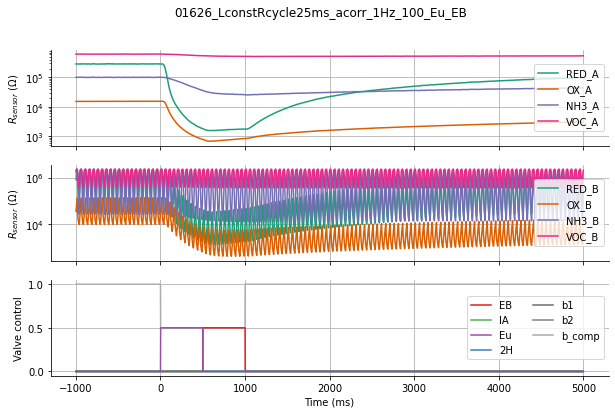

In [4]:
# Load and plot E-nose experiments

# Load index
index_file_enose_new = data_dir_enose.joinpath("index.csv")
index_df_enose_new = pd.read_csv(index_file_enose_new)

# Plot some trials
cmax=5
c=0
# Iterate over index
for i, trial in index_df_enose_new.iterrows():
    # Specify trial conditions
    if trial['condition'] != 'LconstRcycle25ms':
        continue
    if trial['kind'] == 'plume':
        continue

    # Load trial data as dataframe
    #trial_df = get_trial_df(trial, data_dir_enose, ms_start=-1000, ms_stop=5000)
    trial_df = get_trial_df(trial, data_dir_enose)
    trial_id = trial['trial_id']

    # Plot trial data
    plot_enose_trial_df(trial_df, trial_id)

    c+=1
    if c==cmax:
        break

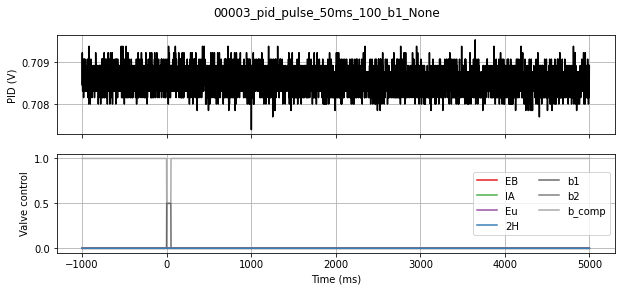

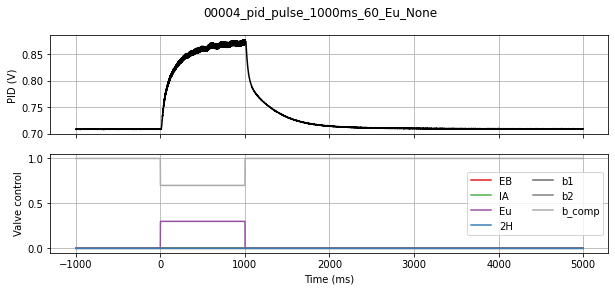

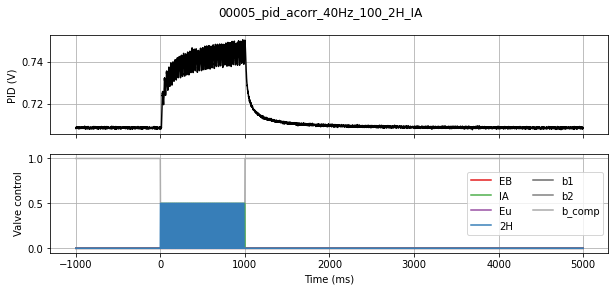

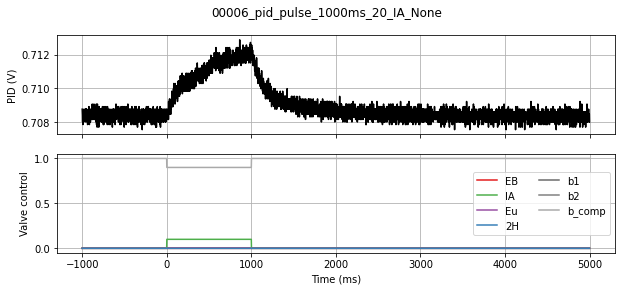

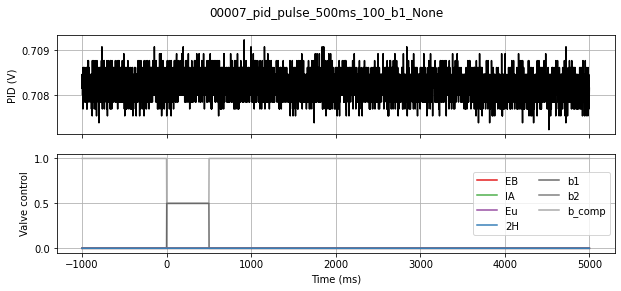

In [5]:
# Load and plot PID experiments

# Load index
index_file_pid_new = data_dir_pid.joinpath("index.csv")
index_df_pid_new = pd.read_csv(index_file_pid_new)

# Plot some trials
cmax=5
c=0
# Iterate over index
for i, trial in index_df_pid_new.iterrows():
    # Specify trial conditions
    if trial['kind'] == 'plume':
        continue

    # Load trial data as dataframe
    trial_df = get_trial_df(trial, data_dir_pid, ms_start=-1000, ms_stop=5000)

    plot_pid_trial_df(trial_df, trial['trial_id'])

    c+=1
    if c==cmax:
        break
# %%
